# Busqueda por Profundidad

A continuacion se ejemplifica la busqueda por profundidad revisada en clase. Para ello se tiene un ejemplo de la solucion de un Puzzle utilizando recursividad

# Instalar conda install -c conda-forge graphviz 
reinicar notebooks



In [3]:
# Busqueda en Profundidad

# Creamos la clase Nodo
class Node:
    def __init__(self, data, child=None): # Constructor de la clase
        self.data = data
        self.child = None
        self.fathr = None
        self.cost = None
        self.set_child(child)

    def set_child(self, child): # Agregar hijos
        self.child = child
        if self.child is not None:
            for ch in self.child:
                ch.fathr = self
            
    def equal(self, node): # Igual al equals de Java
        if self.data == node.data:
            return True
        else:
            return False

    def on_list(self, node_list): # Verfiicar su el nodo esta en la lista
        listed = False
        for n in node_list:
            if self.equal(n):
                listed = True
        return listed

    def __str__(self): # Igual al toString Java
        return str(self.data)

In [38]:
# Implementacion del metodo de busqueda por profundidad
def search_profundidad(init_node, solution, visited):
    visited.append(init_node.data) #Lista de visitados
    if init_node.data == solution: # Condicion de salida recursividad (Encontro la solucion)
        return init_node # Retorno el nodo resultado
    else:
        # Expandir nodos sucesores (hijos)
        node_data = init_node.data
        son = [node_data[1], node_data[0], node_data[2], node_data[3]]
        izq = Node(son)
        son = [node_data[0], node_data[2], node_data[1], node_data[3]]
        centro = Node(son)
        son = [node_data[0], node_data[1], node_data[3], node_data[2]]
        der = Node(son)
        init_node.set_child([izq, centro, der])

        for node_son in init_node.child: # Recorrer los nodos hijos
            if not node_son.data in visited: # No deben estar en los nodos visitados
                # Llamada Recursiva
                Solution = search_profundidad(node_son, solution, visited) 
                if Solution is not None: # Cuando encuentra una solucion
                    return Solution # Retornamos la solucion encontrada
        return None

init_state = [4, 2, 3, 1] # Creamos un estado inicial
solution = [1, 2, 3, 4] # La solucion que debe buscar
#Inicializamos las variables
solution_node = None 
visited = []
init_node = Node(init_state)
node = search_profundidad(init_node, solution, visited) 

def Compare(node):
    return node.cost

# Mostrar Resultado
result = []
while node.fathr is not None:
    result.append(node.data)
    node = node.fathr
result.append(init_state)
result.reverse() # Reverso el resultado (Solo para presentar)
print(result)

[[4, 2, 3, 1], [2, 4, 3, 1], [2, 3, 4, 1], [3, 2, 4, 1], [3, 4, 2, 1], [4, 3, 2, 1], [4, 3, 1, 2], [3, 4, 1, 2], [3, 1, 4, 2], [1, 3, 4, 2], [1, 4, 3, 2], [4, 1, 3, 2], [4, 1, 2, 3], [1, 4, 2, 3], [1, 2, 4, 3], [2, 1, 4, 3], [2, 1, 3, 4], [1, 2, 3, 4]]


## Practica

Implementar un algoritmo que me permita dibujar la busqueda de soluciones.

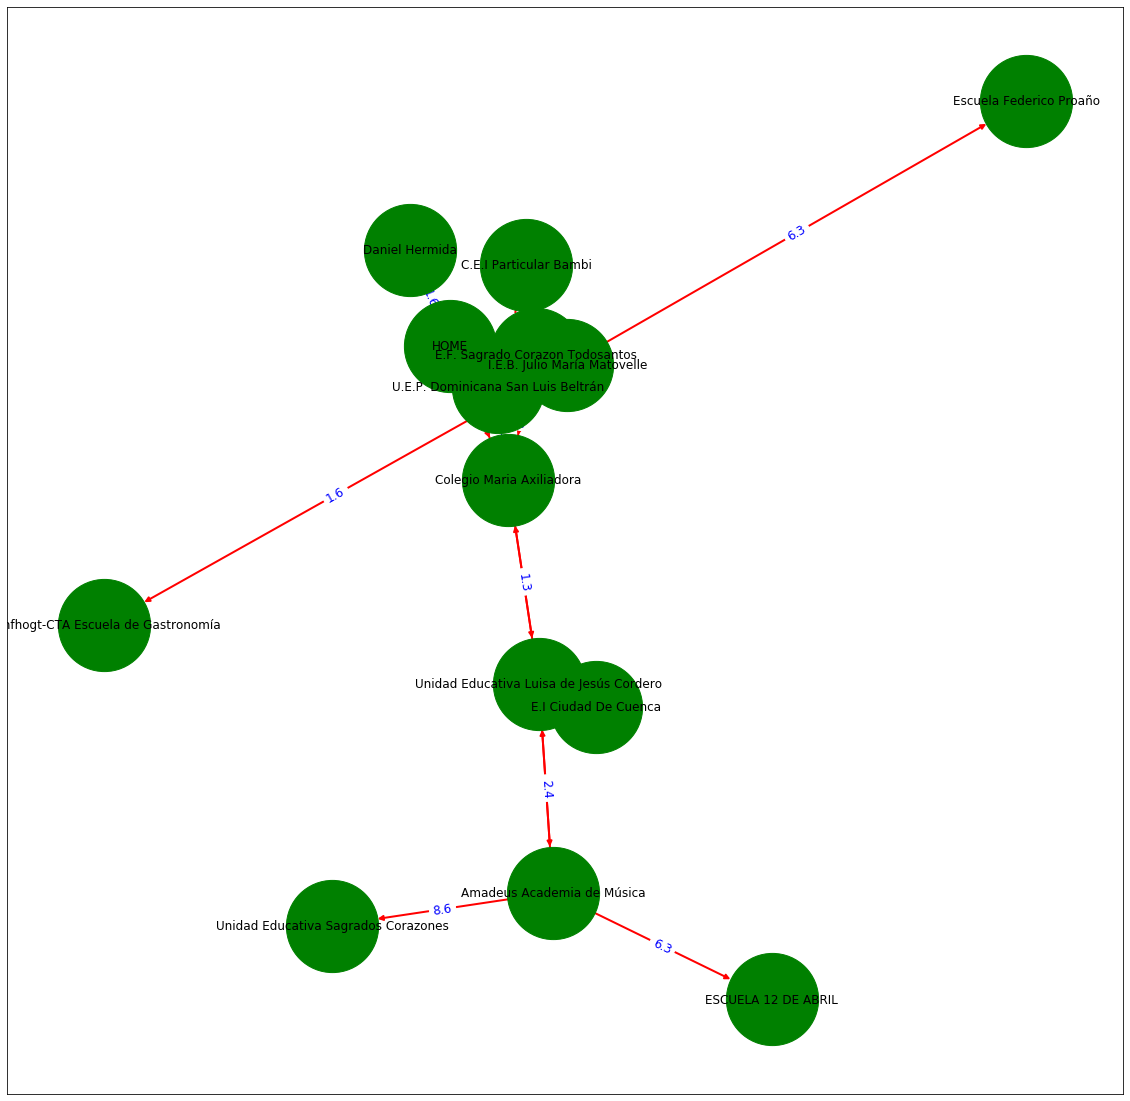

In [40]:

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

connections  = {
        'HOME': {'Daniel Hermida': 1.6, 'Colegio Maria Axiliadora':7.6},
    'Daniel Hermida': {'HOME': 1.6},
    
    'Colegio Maria Axiliadora': {'HOME':7.6,'Unidad Educativa Luisa de Jesús Cordero':1.3,
                                     'U.E.P. Dominicana San Luis Beltrán':8.2,
                                     'E.F. Sagrado Corazon Todosantos':2.2},
    'Unidad Educativa Luisa de Jesús Cordero': {'Colegio Maria Axiliadora':1.3, 
                                                'Amadeus Academia de Música': 3.3,
                                                'E.I Ciudad De Cuenca':2.4},
    'E.I Ciudad De Cuenca': {'Unidad Educativa Luisa de Jesús Cordero':3.3 },
    'U.E.P. Dominicana San Luis Beltrán': {'Colegio Maria Axiliadora':8.2},
    'E.F. Sagrado Corazon Todosantos': {'Colegio Maria Axiliadora':2.2,
                                        'I.E.B. Julio María Matovelle':7.7,
                                       'C.E.I Particular Bambi': 5.6},
    'I.E.B. Julio María Matovelle': {'U.E.P. Dominicana San Luis Beltrán':7.7,
                                    'Escuela Federico Proaño': 6.3,
                                    'Cenfhogt-CTA Escuela de Gastronomía':1.6},  
    'C.E.I Particular Bambi': {'U.E.P. Dominicana San Luis Beltrán':5.6},
    'Amadeus Academia de Música': {'Unidad Educativa Luisa de Jesús Cordero':2.4,
                                   'Unidad Educativa Sagrados Corazones': 8.6,
                                   'ESCUELA 12 DE ABRIL':6.3}
}

graf = nx.DiGraph()
graf.add_nodes_from(connections)
for valor, listaValor in connections.items():
    for a in listaValor:
        graf.add_edge(valor,a,size=250,length=str(listaValor[a]))
    
pos = nx.spring_layout(graf)
plt.figure(figsize=(20,20)) 
labels = nx.get_edge_attributes(graf,'length')
nx.draw_networkx(graf, 
                pos,
                node_color="green",
                edge_color="red",
                font_size=12,
                width=2, 
                with_labels=True, 
                node_size=8500)
nx.draw_networkx_edge_labels(graf,
                            pos,
                            edge_labels=labels,
                            font_color='blue',
                            font_size=12)
plt.show()



# Busqueda  > Resultado

['HOME', 'Colegio Maria Axiliadora', 'Unidad Educativa Luisa de Jesús Cordero', 'Amadeus Academia de Música', 'ESCUELA 12 DE ABRIL']
Costo total: 22.5


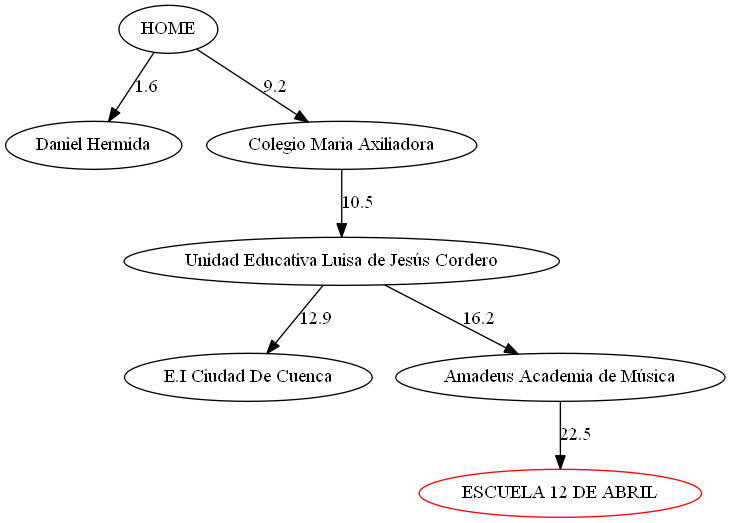

In [41]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import Image, display

Grafo=nx.DiGraph()
#Agremamos el parametro g, de grafo para no tener que agregar la lista de localidades depues
def search_profundidad1(init_node, solution, visited,con,costo,g):
    visited.append(init_node.data)
    if init_node.data == solution: 
        init_node.cost=round(costo,2)
        g.add_node(init_node.data,color='red')
        return init_node 
    else: 
        
        node_data = init_node.data
        child_list=[]
        for node in con[node_data]:
            child = Node(node)
            cost = con[node_data][node]
            child.cost=round(cost,2)
            child_list.append(child)
        child_list = sorted(child_list, key=Compare)
        init_node.set_child(child_list)
        for son in init_node.child:
            if not son.data in visited:
                costo=costo+son.cost
                #Add rama grafica
                g.add_edge(init_node.data,son,label=costo)
                Solution = search_profundidad1(son, solution, visited,con,costo,g) 
                if Solution is not None:
                    return Solution
        return None

init_state = 'HOME' 
solution = 'ESCUELA 12 DE ABRIL' 
solution_node = None 
visited = []
init_node = Node(init_state)  
costo = 0
node = search_profundidad1(init_node, solution, visited,connections,costo,Grafo)
result = []
if node is not None:
    fcosto=node.cost
    while node.fathr is not None:
        result.append(node.data)
        node = node.fathr
    result.append(init_state)
    result.reverse() 
    print(result)
    print("Costo total: %s" % str(fcosto)) 
else:
    print("No hay solucion")


p=nx.drawing.nx_pydot.to_pydot(Grafo)
for i, edge in enumerate(p.get_edges()):
    edge.set_label(str(edge.get_label()))
    
p = Image(p.create_png())
display(p)


    



# Cuatro Reinas

In [44]:

def Reinas(posIni,fila,n):
    if fila>=n:
        return 0
    enc = 0
    while 1:
            if (posIni[fila] < n):
                posIni[fila] = posIni[fila] + 1
            
            if (Validation(posIni,fila)):
                
                if fila != n-1:
                    enc = CuatroReinas(posIni, fila+1,n)
                    if enc==0:
                        posIni[fila+1] = 0
                else:
                    print(posIni)
                    enc = 1
            if (posIni[fila]==n or enc==1):
                break
    return enc

def Validation(posIni,fila):
    for i in range(fila):
        if (posIni[i]==posIni[fila]) or (abs(fila-i)== abs(posIni[fila]-posIni[i])):
            return False
    return True

posIni=[0,1,0,0]
fila=1
res = Reinas(posIni,fila,4)
print(res)

[0, 2, 4, 1]
1


# Concluciones
* El metodo por amplitud no es optimo ya que en tendra que ir buscando por los nodos hijos hasta que se termine la rama, y en caso no no obtener la repuesta tiene que regresar para iniciar de la otra rama